In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
os.chdir("/Users/serrauzun/Desktop/MSDS_422_Practical")
df = pd.read_csv('HMEQ_Loss_clean.csv')

In [4]:
df_binary = df[['TARGET_BAD_FLAG', 'REASON_DebtCon', 'REASON_HomeImp', 'REASON_Missing', 'JOB_Mgr', 'JOB_Missing', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']]

Let's remove the binary variables from our dataset to get the best and most accurate results on our PCA

In [5]:
x = df.copy()
x = x.drop(df_binary, axis=1 )
varNames = x.columns

In [6]:
x.head().T

,0,1,2,3,4
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,0.000000
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
MORTDUE,25860.000000,70053.000000,13500.000000,65019.000000,97800.000000
VALUE,39025.000000,68400.000000,16700.000000,89235.500000,112000.000000
YOJ,10.500000,7.000000,4.000000,7.000000,3.000000
DEROG,0.000000,0.000000,0.000000,0.000000,0.000000
DELINQ,0.000000,2.000000,0.000000,0.000000,0.000000
CLAGE,94.366667,121.833333,149.466667,173.466667,93.333333
NINQ,1.000000,0.000000,1.000000,1.000000,0.000000
CLNO,9.000000,14.000000,10.000000,20.000000,14.000000


In [7]:
theScaler = StandardScaler()
theScaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
x_std = theScaler.transform(x)

In [9]:
max_n = x_std.shape[1]
max_n

11

We have 11 variables so now we will set our pca to have 11 components

In [10]:
pca = PCA(n_components = max_n)
pca.fit(x_std)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

We will now look at eigen values to seen how much information is in each component

In [11]:
ev = pca.explained_variance_
print("Eigen Values")
print(ev)

Eigen Values
[2.23602553 1.89155257 1.27424046 1.0488845  0.95815283 0.84127598
 0.79714086 0.74358928 0.63790425 0.44104532 0.13206555]


We can see that the the first component with 2.24 Eigen Value has the most amount of information. 2.24 Eigen value of component 1 is followed by two with 1.89, three with 1.27 and four with 1.05. Pass the 4th component Eigen value drops below 1. 

In [12]:
varPCT = []
totPCT = []
total = 0

In [13]:
for i in ev:
    total = total + i
    VAR = int( i / len(ev) * 100)
    PCT = int( total / len(ev) * 100)
    varPCT.append(VAR)
    totPCT.append(PCT)
    print(round(i,2), "variation=", VAR,"%"," total=", PCT,"%")

2.24 variation= 20 %  total= 20 %
1.89 variation= 17 %  total= 37 %
1.27 variation= 11 %  total= 49 %
1.05 variation= 9 %  total= 58 %
0.96 variation= 8 %  total= 67 %
0.84 variation= 7 %  total= 75 %
0.8 variation= 7 %  total= 82 %
0.74 variation= 6 %  total= 89 %
0.64 variation= 5 %  total= 94 %
0.44 variation= 4 %  total= 98 %
0.13 variation= 1 %  total= 100 %


From the above list we can see that component one holds 20 percent of the information. We need all the variables to reach 100%, yet with 8 (0 to 7) variables we cover almost 90 percent of the information.

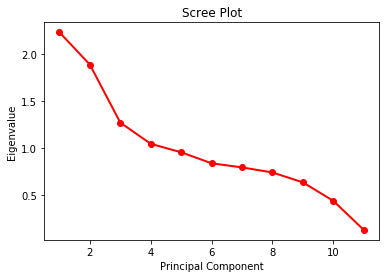

In [14]:
PC_NUM = np.arange(max_n) + 1
plt.plot(PC_NUM , ev, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

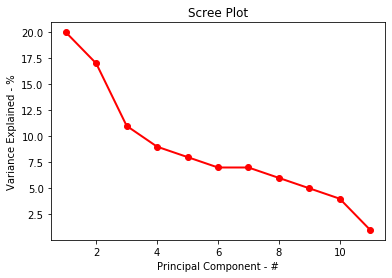

In [15]:
PC_NUM = np.arange(max_n) + 1
plt.plot( PC_NUM , varPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component - #')
plt.ylabel('Variance Explained - %')
plt.show()

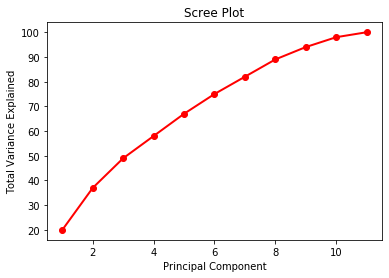

In [16]:
PC_NUM = np.arange(max_n) + 1
plt.plot( PC_NUM , totPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Total Variance Explained')
plt.show()

In [17]:
dfc = pd.DataFrame(pca.components_)
dfc.columns = list(x.columns)
print(dfc)

    TARGET_LOSS_AMT      LOAN   MORTDUE     VALUE       YOJ     DEROG  \
0          0.081988  0.267405  0.578739  0.606279  0.024087 -0.033348   
1          0.580699  0.045400 -0.026277 -0.019115 -0.047318  0.401818   
2          0.014958  0.057149 -0.239904 -0.154050  0.649916 -0.085019   
3          0.138591  0.781972 -0.169203 -0.025363  0.290481  0.063117   
4         -0.208936 -0.184319 -0.132445 -0.178111  0.010866  0.229842   
5         -0.019580  0.162280 -0.120876 -0.098285 -0.273103  0.613548   
6         -0.171714 -0.078482  0.116244  0.129177  0.112916  0.566684   
7          0.154276  0.306015 -0.212274 -0.149865 -0.616056 -0.269376   
8         -0.170722 -0.044487  0.120120  0.128385 -0.115988  0.032097   
9          0.714045 -0.362403  0.069993 -0.024064  0.094716 -0.047150   
10         0.017470 -0.135124 -0.684203  0.714209 -0.031740 -0.001660   

      DELINQ     CLAGE      NINQ      CLNO   DEBTINC  
0   0.047594  0.231982 -0.007883  0.375141  0.143853  
1   0.454536 

In [18]:
pca = PCA(n_components = max_n)
pca.fit(x_std)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
x_pca = pca.transform(x_std)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-2.865963,0.155170,-0.107874,-0.809012,-0.751538,-1.112336,0.627023,-0.393440,-0.266576,-0.110319,0.119021
1,-1.417085,0.866563,0.113970,-1.912648,-1.303637,-0.530000,-0.193783,-0.518738,0.502627,-0.674336,-0.298277
2,-3.172426,0.149320,-0.151269,-1.089726,-0.468637,-0.716039,0.594184,0.677099,-0.087039,-0.090037,0.016794
3,-0.939059,0.222763,-0.113738,-1.540292,-0.436616,-1.072145,0.875724,0.166829,-0.350801,-0.076931,0.130846
4,-0.591185,-0.027098,-1.265551,-1.745048,-1.466700,-0.864668,0.833184,-0.375194,-0.212982,-0.283226,-0.112858


Per the Eigen Value results and our scree plots we see that we cover almost 90% of the information with first 8 variables, thus we will grab them for the remainder of our analysis

In [20]:
x_pca = x_pca.iloc[:,0:7]

In [21]:
colNames = x_pca.columns
pcaNames = []
for i in colNames :
    index = int(i) + 1
    theName = "PC_" + str(index)
    pcaNames.append(theName)

In [22]:
x_pca.columns = pcaNames

In [23]:
print(x_pca.head())

       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7
0 -2.865963  0.155170 -0.107874 -0.809012 -0.751538 -1.112336  0.627023
1 -1.417085  0.866563  0.113970 -1.912648 -1.303637 -0.530000 -0.193783
2 -3.172426  0.149320 -0.151269 -1.089726 -0.468637 -0.716039  0.594184
3 -0.939059  0.222763 -0.113738 -1.540292 -0.436616 -1.072145  0.875724
4 -0.591185 -0.027098 -1.265551 -1.745048 -1.466700 -0.864668  0.833184


In [24]:
x_pca["TARGET"] = df.TARGET_BAD_FLAG
print(x_pca.head())

       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -2.865963  0.155170 -0.107874 -0.809012 -0.751538 -1.112336  0.627023   
1 -1.417085  0.866563  0.113970 -1.912648 -1.303637 -0.530000 -0.193783   
2 -3.172426  0.149320 -0.151269 -1.089726 -0.468637 -0.716039  0.594184   
3 -0.939059  0.222763 -0.113738 -1.540292 -0.436616 -1.072145  0.875724   
4 -0.591185 -0.027098 -1.265551 -1.745048 -1.466700 -0.864668  0.833184   

   TARGET  
0       1  
1       1  
2       1  
3       1  
4       0  


In [25]:
for Name, Group in x_pca.groupby("TARGET"):
    print(Group.head(10))
    print("\n")

        PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
4  -0.591185 -0.027098 -1.265551 -1.745048 -1.466700 -0.864668  0.833184   
13 -0.904644  0.067210 -0.462130 -1.928392 -0.676052 -0.566922  0.638936   
19 -0.146466 -0.855330 -1.658999 -1.315499 -0.807840  0.017426 -0.043264   
26 -0.258524 -0.818944 -1.408371 -1.237724 -0.817937 -0.086180  0.029147   
29 -2.643833 -0.179980  0.646058 -1.208316 -0.711424 -0.467028  0.860727   
30 -1.037048 -0.328047  0.513549 -1.569109 -0.964939 -0.748038  1.347297   
34 -0.218958 -0.812748 -1.684461 -1.344950 -0.818949  0.038547 -0.019040   
35 -0.088934 -0.828657 -1.587185 -1.322203 -0.840898 -0.016722  0.043831   
38 -0.055448 -0.843257 -1.690763 -1.287349 -0.785307  0.033489 -0.090891   
48 -0.859664  0.778687  1.264920 -2.079391 -0.552105 -0.430763 -0.062291   

    TARGET  
4        0  
13       0  
19       0  
26       0  
29       0  
30       0  
34       0  
35       0  
38       0  
48       0  


        PC_1      

As the above values per PC do not present a significant differentiation, let's try scatter plots between certain PCs that may give us a better and more elaborate insight. 

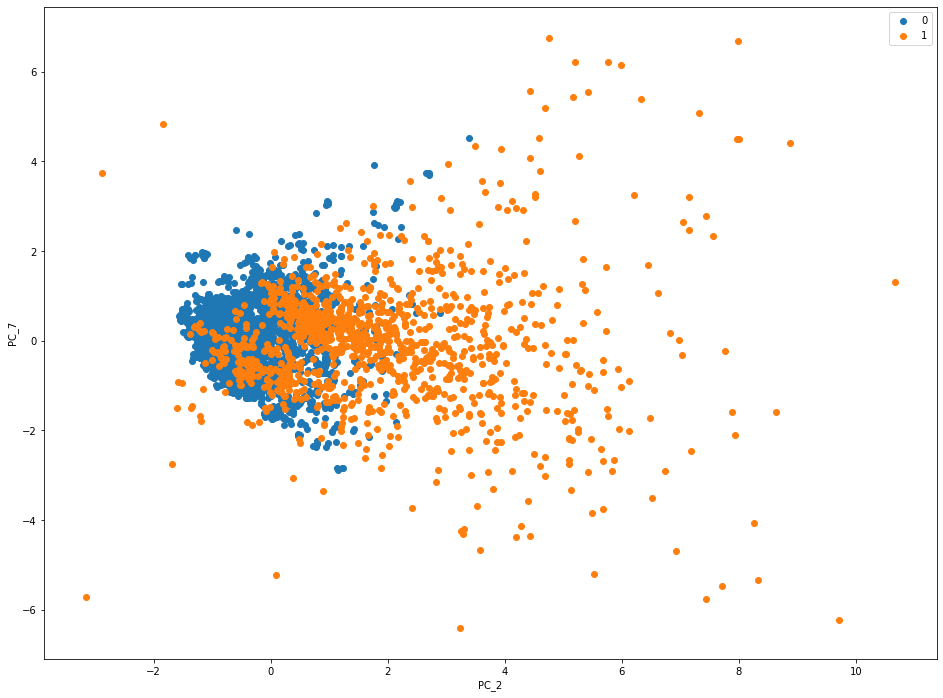

In [26]:
plt.figure(figsize=(16, 12))
for Name, Group in x_pca.groupby("TARGET"):
    plt.scatter(Group.PC_2, Group.PC_7, label=Name)
plt.xlabel("PC_2")
plt.ylabel("PC_7")
plt.legend()
plt.show()

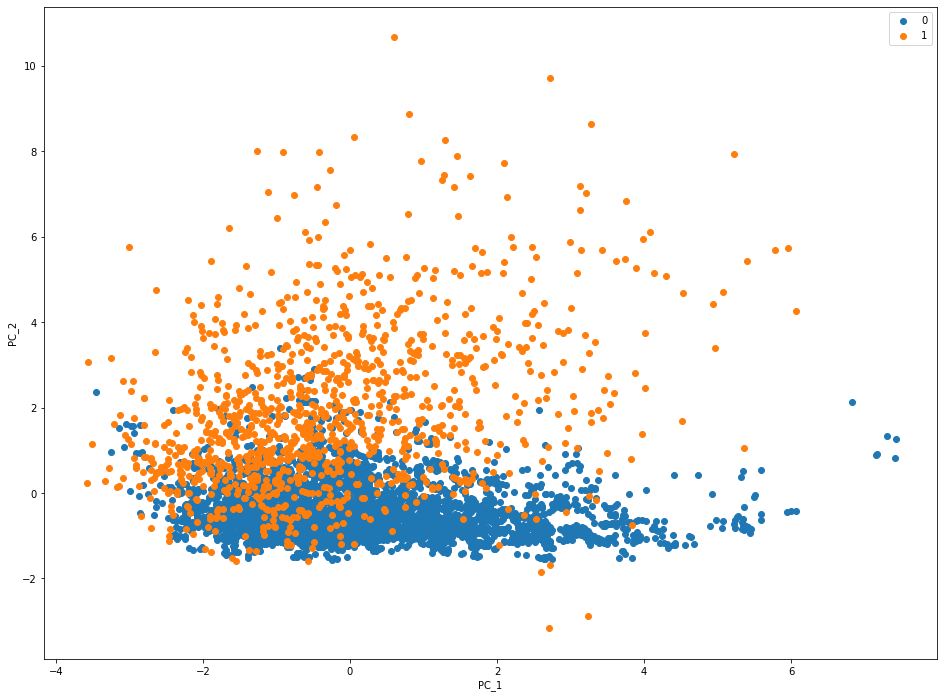

In [27]:
plt.figure(figsize=(16, 12))
for Name, Group in x_pca.groupby("TARGET"):
    plt.scatter(Group.PC_1, Group.PC_2, label=Name)
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.legend()
plt.show()

While the PCA grouped by TARGET variables values do not show a significant differentiation between the principles components, the two scatter plots above show a minor distinction between certain PCs. 

The first graph plots PC_2 against PC_7 and we see that even though there are quite some overlaps, value in PC_2 that is above 2 and value in PC_7 that is above 2 or below -2 is very likely Target = 1, thus a defaulted home credit. For the PC_2 and PC_7 values that are between -2 and 2, we do not see any distinct separation that will give us a clear understanding of the default possibility.

Secondly and finally, when we plot PC_1 against PC_2 we see that any value above 2 in PC_2 is most likely a defaulted credit. We do not see s distinct scatter or clustering for PC_1. 

**Appendix**

Below are some other scatter plots that we plotted yet didn't give us a valuable usable outcome. 

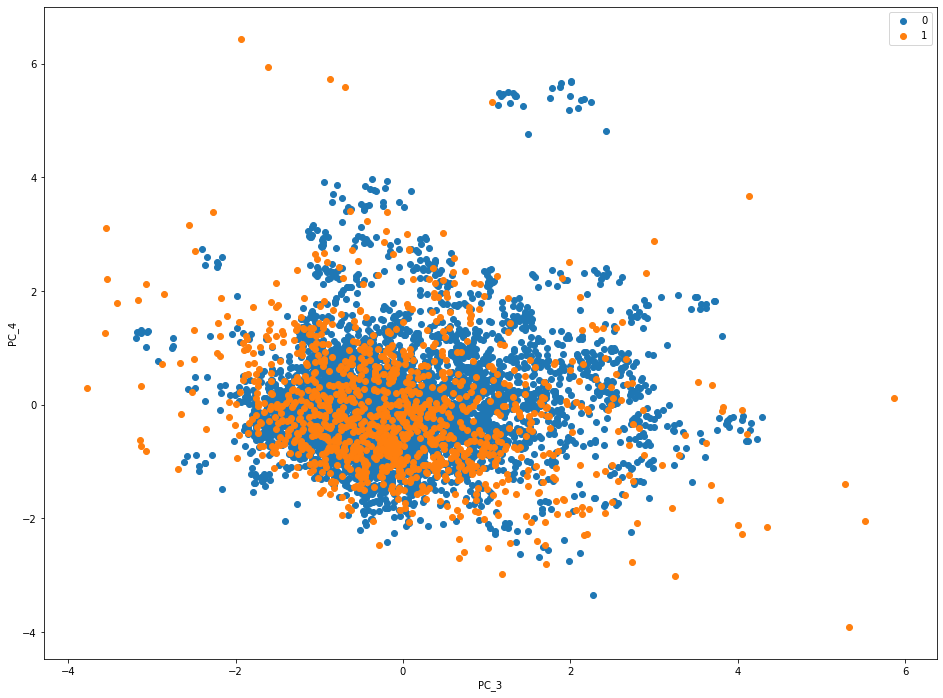

In [28]:
plt.figure(figsize=(16, 12))
for Name, Group in x_pca.groupby("TARGET"):
    plt.scatter(Group.PC_3, Group.PC_4, label=Name)
plt.xlabel("PC_3")
plt.ylabel("PC_4")
plt.legend()
plt.show()

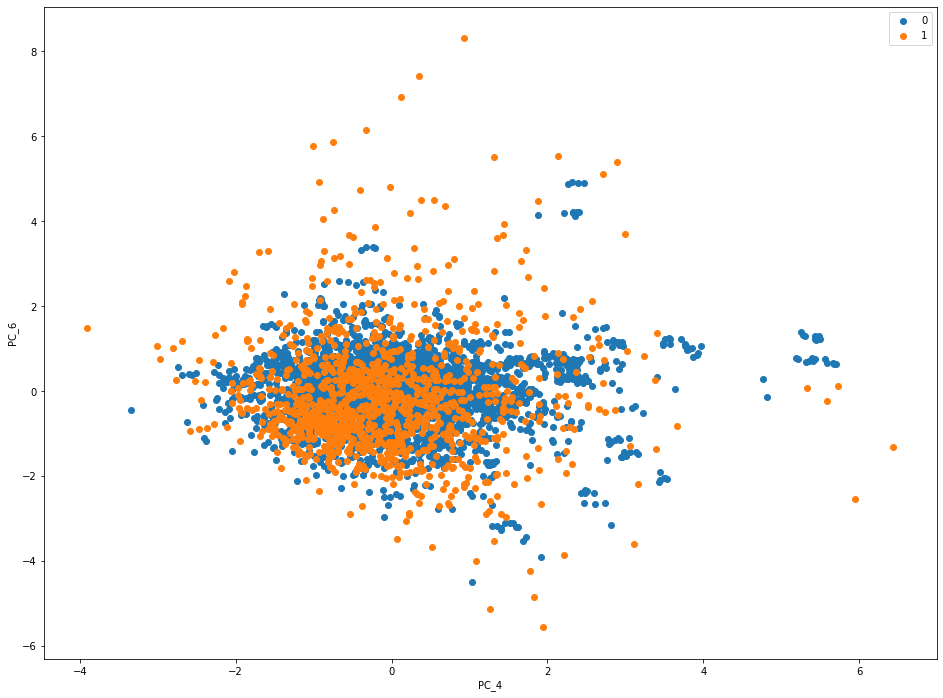

In [29]:
plt.figure(figsize=(16, 12))
for Name, Group in x_pca.groupby("TARGET"):
    plt.scatter(Group.PC_4, Group.PC_6, label=Name)
plt.xlabel("PC_4")
plt.ylabel("PC_6")
plt.legend()
plt.show()

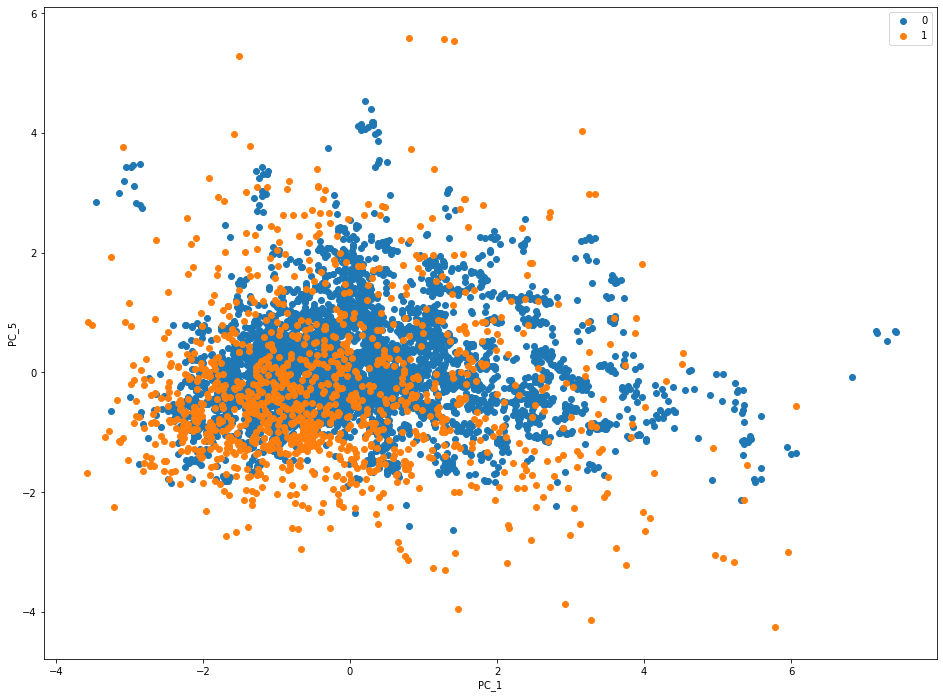

In [30]:
plt.figure(figsize=(16, 12))
for Name, Group in x_pca.groupby("TARGET"):
    plt.scatter(Group.PC_1, Group.PC_5, label=Name)
plt.xlabel("PC_1")
plt.ylabel("PC_5")
plt.legend()
plt.show()